In [1]:
using HDF5, StatsBase, PyPlot
push!(LOAD_PATH, "../Preprocesamiento/")
using ArraySetTools, OrdenaSets

In [2]:
arxname="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

"/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

In [3]:
arx=h5open(arxname)

HDF5 data file: /home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5

In [4]:
names(arx)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos" 
 "CanalesMalos"  
 "LFPSaturados"  
 "desde"         
 "freq"          
 "hasta"         

In [5]:
canales=read(arx["CanalesBuenos"])
lfp=read(arx["LFPSaturados"]);
nmax=size(lfp)[3]

2000

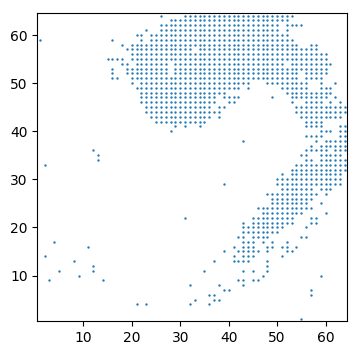

PyObject <matplotlib.collections.PathCollection object at 0x7fedb979b4a8>

In [6]:
ff=figure(figsize=(4,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(canales[:,2], canales[:,1], s=0.5)

In [45]:
yxref=[39,40]
orderchans=barreconjuntoyordena(canales, yxref);

alfamin = 0.015623728620476831


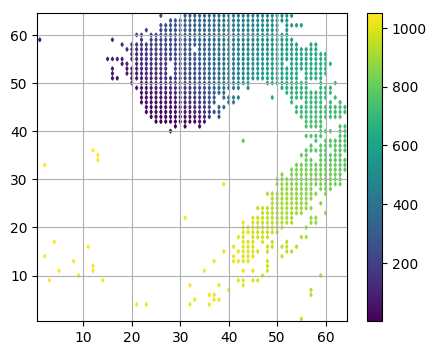

In [46]:
ff=figure(figsize=(5,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
#scatter(canales[:,2], canales[:,1], s=0.5)
scatter(orderchans[:,2], orderchans[:,1], marker="d",s=3, cmap="viridis", c=orderchans[:,3])
colorbar()
grid()

In [41]:
function freediaconis(datos)
    # Freedman and Diaconis
    n=length(datos)
    m=iqr(datos)
    result=2*m/cbrt(n)
    return result
end
    
function sacaentropia(datos::Array)
    binsize=freediaconis(datos)
    (vmin,vmax)=extrema(datos)
    normalizador=size(datos,1)
    if(binsize != 0 )
        rango=vmin:binsize:vmax
        histodo=fit(Histogram,datos,rango)
        pdf=histodo.weights./normalizador
        result=entropy(pdf)
    else
        result=0
    end
    return result
end

sacaentropia (generic function with 3 methods)

In [36]:
function sacaentropia(datosX::Array, datosY::Array)
    # ambos arrays deben ser igual de largos ???
    binsizeX=freediaconis(datosX)
    binsizeY=freediaconis(datosY)
    if (binsizeX==0 || binsizeY==0)
        error(" ¡Esto que, no tiene variacion en los datos!")
    else
        (viX,vfX)=extrema(datosX)
        (viY,vfY)=extrema(datosY)
        rangoX=viX:binsizeX:vfX
        rangoY=viY:binsizeY:vfY
        
        histodo=fit(Histogram, (datosX, datosY), (rangoX, rangoY))
        
        pdf=histodo.weights
        pdf=pdf./sum(pdf)
        result=entropy(pdf)
        return result
        #return (result, histodo)
    end

end

sacaentropia (generic function with 2 methods)

In [42]:
function infomutua(datosX::Array, datosY::Array)
    hetaX=sacaentropia(datosX)
    hetaY=sacaentropia(datosY)
    hetaXY=sacaentropia(datosX,datosY)
    result=hetaX+hetaY-hetaXY
    return result
end

infomutua (generic function with 1 method)

In [44]:
ex1=lfp[60, 20,:]
ex2=lfp[55, 26,:]

heta=sacaentropia(ex1,ex2)
sacaentropia(ex1)
tarar=infomutua(ex1,ex2)

0.31461264363166386

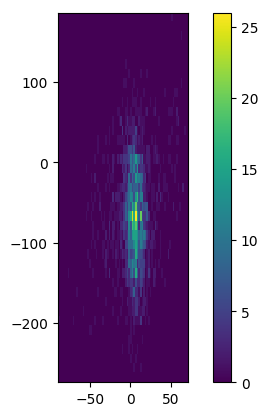

PyObject <matplotlib.colorbar.Colorbar object at 0x7fedb34b0ef0>

In [28]:
extx1=blus.edges[1][1]
extx2=blus.edges[1][end]
exty1=blus.edges[2][1]
exty2=blus.edges[2][end]


imshow(blus.weights, extent=[extx1, extx2, exty1, exty2])
colorbar()

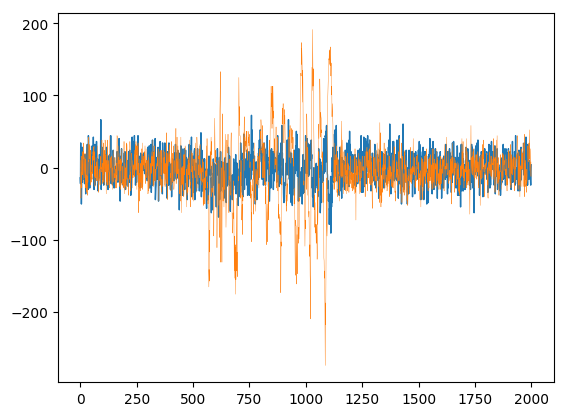

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fedb3332048>

In [31]:
plot(ex1, lw=1)
plot(ex2, lw=0.3)

In [49]:
nchan=size(orderchans, 1)
hetas=zeros(nchan)
otra=zeros(nchan)
for j=2:nchan
    reng,col=orderchans[j,1],orderchans[j,2]
    ejemplo=lfp[reng,col,:]
    hetas[j]=sacaentropia(ejemplo)
end

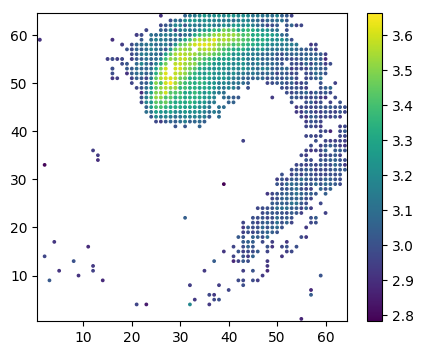

PyObject <matplotlib.colorbar.Colorbar object at 0x7fedb2e4bcc0>

In [54]:
ff=figure(figsize=(5,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(orderchans[2:end,2], orderchans[2:end,1], s=hetas, c=hetas[2:end])
colorbar()

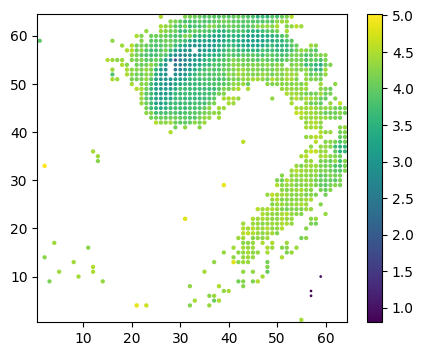

PyObject <matplotlib.colorbar.Colorbar object at 0x7f07984d91d0>

In [33]:
ff=figure(figsize=(5,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(canales[:,2], canales[:,1], s=otra, c=otra)
colorbar()

In [35]:
fufu=hetas-otra

1050-element Array{Float64,1}:
 -1.2017047713580835 
 -1.4997975323860695 
 -1.3124895451953082 
 -0.2180532055649742 
 -1.4927292273587325 
 -1.0754737982391696 
 -0.650553416635772  
 -0.34961804812297403
 -0.04712064021812923
 -1.2740319096347683 
 -1.1280890813575697 
 -0.7130640344347499 
 -1.4003031282830896 
  ⋮                  
 -1.2099197640822155 
 -1.1284360289814024 
 -1.2395621055683819 
 -1.3465557043785599 
 -0.9384893992271222 
 -0.6178684755083865 
 -1.093472647805509  
 -1.2460041675661517 
 -0.9500131285688935 
 -1.1560591309014971 
 -0.22604901457527982
 -0.4526954836824184 

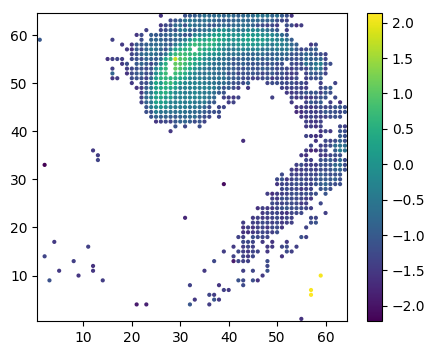

PyObject <matplotlib.colorbar.Colorbar object at 0x7f07983a6320>

In [36]:
ff=figure(figsize=(5,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(canales[:,2], canales[:,1], s=4, c=fufu)
colorbar()

In [ ]:
todas=zeros(64,64)
for j=1:64, k=1:64
    ejemplo=lfp[j,k,:]
    if(j,k)!=(1,1)
    todas[j,k]=sacaentropia(ejemplo)[2]
    end
end

In [ ]:
imshow(todas, origin="lower", vmin=0, vmax=11)
colorbar()

In [ ]:
?entropy